<a href="https://colab.research.google.com/github/peternguyen24/NeuralNetworkBasic/blob/main/language/building_makemore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
words = open('/content/drive/MyDrive/Colab Notebooks/names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [20]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

# PART 1: Build matrix of ch1->ch2 probability

In [17]:
chars = set()
for word in words:
  for ch in word:
    chars.add(ch)
chars = sorted(list(chars))

stoi = {ch: idx for idx, ch in enumerate(chars)}
stoi['.'] = 26

itos = {idx: ch for ch, idx in stoi.items()}
print(itos)
print(stoi)

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: '.'}
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, '.': 26}


In [18]:
N = torch.zeros((27, 27), dtype=torch.int32)

for w in words:
  for ch1, ch2 in zip('.' + w, w + '.'):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

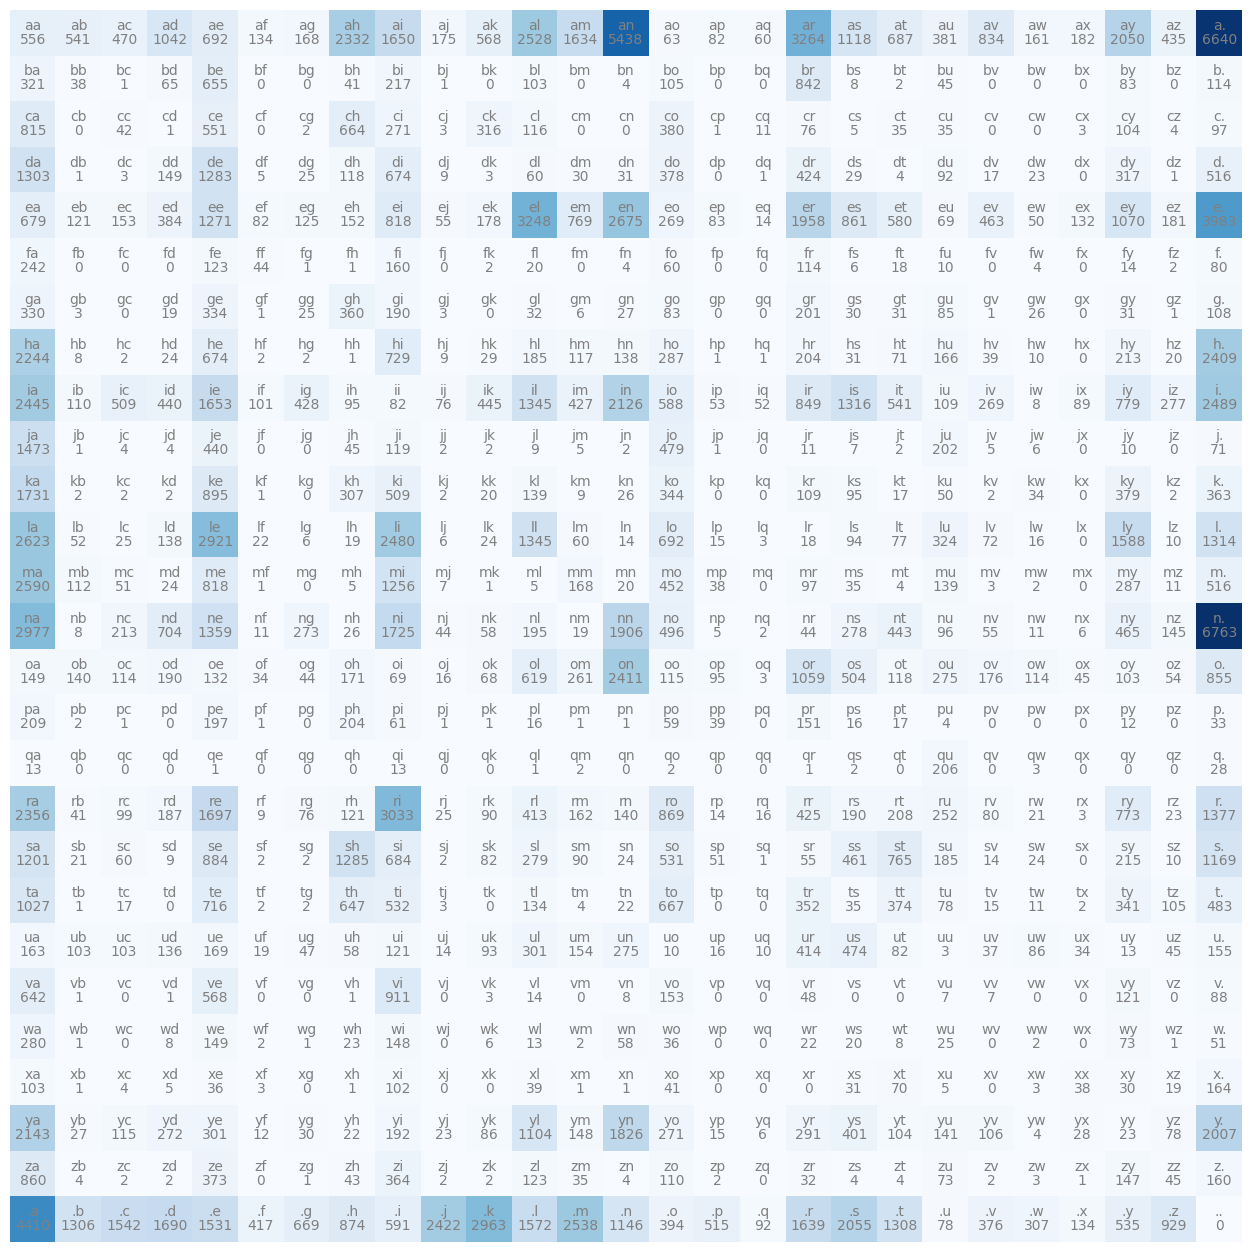

In [21]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(len(stoi)):
  for j in range(len(stoi)):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
    plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')
